# Haplotype homozygosity of a 27kb locus

* My Drive/GitHub/transmission_ms/haplotype_homozygosity_27kb.ipynb
* Started 7 Nov 2022
* From 210823_haplotype_homozygosity.ipynb

We calculate and plot the variation of homozygosity for a 27kb locus for different sets of transmission parameters

In [1]:
import coalestr as cs
import matplotlib.pyplot as plt

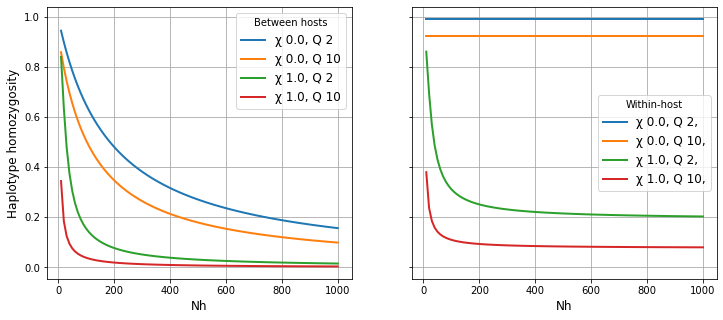

In [2]:
N_list = range(10, 1001, 10)
Q_list = [2, 10]
X_list = [0, 1]

duration = 10000 # duration of simulation in generation

fig, [a1, a2] = plt.subplots(1, 2, figsize = (12, 5), sharey = True)

for X in X_list:
    for Q in Q_list:
        
        beho_hap_hom = []
        wiho_hap_hom = []
        
        for N in N_list:
            history = [[duration, N, Q, X, 0]]  # t_his, Nh, Q, chi, migration
            my_pop = cs.Population(history)
            my_pop.get_coalescent(observe = "auto", show = False)
            my_pop.get_diversity(show = False)

            beho_hap_hom.append(my_pop.diversity[0,3]) # between-host haplotype homozygosity
            wiho_hap_hom.append(my_pop.diversity[0,4]) # within-host haplotype homozygosity

        a1.plot(N_list, beho_hap_hom, linewidth=2, label = '\u03C7 {0:.1f}, Q {1:.0f}'.format(X, Q))
        a2.plot(N_list, wiho_hap_hom, linewidth=2, label = '\u03C7 {0:.1f}, Q {1:.0f},'.format(X, Q))   


a1.set_xlabel("Nh", fontsize=12)
a1.set_ylabel("Haplotype homozygosity", fontsize=12)
a1.legend(title = 'Between hosts', frameon=True, fontsize=12)
a1.grid(b=True, which='both', color='0.65', linestyle='-')

a2.set_xlabel("Nh", fontsize=12)
a2.legend(title = 'Within-host', frameon=True, fontsize=12)
a2.grid(b=True, which='both', color='0.65', linestyle='-')

plt.show()